In [23]:
import os
import shutil

rota_path_dir = r'C:\Users\yawen\Desktop\Jennifer_Advanced glaucoma\ALL_ROTA'
to_dir = r'C:\Users\yawen\Desktop\ROTA_classified\data\With defects'
subject_dict = {}
for imgname in os.listdir(rota_path_dir):
    name = imgname.split('_')[0] + '_' + imgname.split('_')[1]
    if name not in subject_dict:
        subject_dict[name] = []
        subject_dict[name].append(imgname)
    else:
        subject_dict[name].append(imgname)

images = []
for name in subject_dict:
    images.append(subject_dict[name][0])
    shutil.copy(os.path.join(rota_path_dir, subject_dict[name][0]), to_dir)

['CMC029_R_20160516_165304_TopQ5384_FID66920_ROTA.png']
['CMC029_R_20160516_165304_TopQ5384_FID66920_ROTA.png', 'CMC054_R_20160630_101754_TopQ5636_FID53304_ROTA.png']
['CMC029_R_20160516_165304_TopQ5384_FID66920_ROTA.png', 'CMC054_R_20160630_101754_TopQ5636_FID53304_ROTA.png', 'CMC095_L_20160825_154225_TopQ4402_FID84348_ROTA.png']
['CMC029_R_20160516_165304_TopQ5384_FID66920_ROTA.png', 'CMC054_R_20160630_101754_TopQ5636_FID53304_ROTA.png', 'CMC095_L_20160825_154225_TopQ4402_FID84348_ROTA.png', 'CMC095_R_20160825_153501_TopQ5583_FID53776_ROTA.png']
['CMC029_R_20160516_165304_TopQ5384_FID66920_ROTA.png', 'CMC054_R_20160630_101754_TopQ5636_FID53304_ROTA.png', 'CMC095_L_20160825_154225_TopQ4402_FID84348_ROTA.png', 'CMC095_R_20160825_153501_TopQ5583_FID53776_ROTA.png', 'CMC106_R_20160714_104100_TopQ5355_FID54396_ROTA.png']
['CMC029_R_20160516_165304_TopQ5384_FID66920_ROTA.png', 'CMC054_R_20160630_101754_TopQ5636_FID53304_ROTA.png', 'CMC095_L_20160825_154225_TopQ4402_FID84348_ROTA.png', 'CMC

In [27]:
import os
import random
import shutil

with_defect_dir = r'C:\Users\yawen\Desktop\ROTA_classified\data\With defects'
without_defect_dir = r'C:\Users\yawen\Desktop\ROTA_classified\data\Without defects'

with_defect_dict = {}
for imgname in os.listdir(with_defect_dir):
    name = imgname.split('_')[0] + '_' + imgname.split('_')[1]
    if name not in with_defect_dict:
        with_defect_dict[name] = []
        with_defect_dict[name].append(imgname)
    else:
        with_defect_dict[name].append(imgname)

without_defect_dict = {}
for imgname in os.listdir(without_defect_dir):
    name = imgname.split('_')[0] + '_' + imgname.split('_')[1]
    if name not in without_defect_dict:
        without_defect_dict[name] = []
        without_defect_dict[name].append(imgname)
    else:
        without_defect_dict[name].append(imgname)

# create train and test folders, create 0 and 1 folders in train and test folders
if not os.path.exists(r'C:\Users\yawen\Desktop\ROTA_classified\data\train'):
    os.mkdir(r'C:\Users\yawen\Desktop\ROTA_classified\data\train')
if not os.path.exists(r'C:\Users\yawen\Desktop\ROTA_classified\data\test'):
    os.mkdir(r'C:\Users\yawen\Desktop\ROTA_classified\data\test')
if not os.path.exists(r'C:\Users\yawen\Desktop\ROTA_classified\data\train\0'):
    os.mkdir(r'C:\Users\yawen\Desktop\ROTA_classified\data\train\0')
if not os.path.exists(r'C:\Users\yawen\Desktop\ROTA_classified\data\train\1'):
    os.mkdir(r'C:\Users\yawen\Desktop\ROTA_classified\data\train\1')
if not os.path.exists(r'C:\Users\yawen\Desktop\ROTA_classified\data\test\0'):
    os.mkdir(r'C:\Users\yawen\Desktop\ROTA_classified\data\test\0')
if not os.path.exists(r'C:\Users\yawen\Desktop\ROTA_classified\data\test\1'):
    os.mkdir(r'C:\Users\yawen\Desktop\ROTA_classified\data\test\1')

# random 8:2 split
random.seed(42)
all_with_defect_keys = list(with_defect_dict.keys())
random.shuffle(all_with_defect_keys)
train_with_defect_keys = all_with_defect_keys[:int(len(all_with_defect_keys)*0.8)]
test_with_defect_keys = all_with_defect_keys[int(len(all_with_defect_keys)*0.8):]

all_without_defect_keys = list(without_defect_dict.keys())
random.shuffle(all_without_defect_keys)
train_without_defect_keys = all_without_defect_keys[:int(len(all_without_defect_keys)*0.8)]
test_without_defect_keys = all_without_defect_keys[int(len(all_without_defect_keys)*0.8):]

# copy files to target folders
for key in train_with_defect_keys:
    for imgname in with_defect_dict[key]:
        shutil.copy(os.path.join(with_defect_dir, imgname), r'C:\Users\yawen\Desktop\ROTA_classified\data\train\1')
for key in train_without_defect_keys:
    for imgname in without_defect_dict[key]:
        shutil.copy(os.path.join(without_defect_dir, imgname), r'C:\Users\yawen\Desktop\ROTA_classified\data\train\0')
for key in test_with_defect_keys:
    for imgname in with_defect_dict[key]:
        shutil.copy(os.path.join(with_defect_dir, imgname), r'C:\Users\yawen\Desktop\ROTA_classified\data\test\1')
for key in test_without_defect_keys:
    for imgname in without_defect_dict[key]:
        shutil.copy(os.path.join(without_defect_dir, imgname), r'C:\Users\yawen\Desktop\ROTA_classified\data\test\0')


(480, 640, 3)


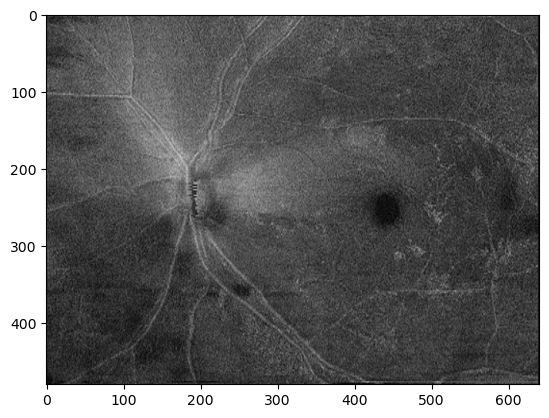

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read train/1 and plt image
for imgname in os.listdir(r'C:\Users\yawen\Desktop\ROTA_classified\ROTAClassifier\data\train\1'):
    img = cv2.imread(os.path.join(r'C:\Users\yawen\Desktop\ROTA_classified\ROTAClassifier\data\train\1', imgname))
    print(np.shape(img))
    plt.imshow(img)
    plt.show()
    break